In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sklearn.pipeline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import optuna
import pickle
import scipy
import yellowbrick

import sklearn
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, \
    QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts

import posture_detector
from posture_detector.constants import columns


In [3]:
figure_path = '../images/'

In [4]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

# Load and parse dataset

In [43]:
data_location = 'data/raw/datalog_at_2021-07-04_19_07_28.038692'

In [44]:
df_raw = pd.read_csv('../' + data_location)
df_raw.head()

,Ax,Ay,Az,Temperature,gx,gy,gz,FlexSensor,Label
0,-0.187500,-0.883301,-0.452393,27.4947,1.90840,1.625950,-13.87790,562,NaN
1,-0.286377,-0.917725,-0.354248,27.4947,-4.64122,-1.694660,-4.77099,561,NaN
2,-0.350342,-0.951172,-0.354492,27.4947,-5.37405,-0.496183,1.30534,561,NaN
3,-0.303711,-0.922119,-0.364258,27.5888,-3.95420,0.015267,0.51145,561,NaN
4,-0.299561,-0.919678,-0.356934,27.4947,-2.96947,1.145040,5.68702,561,NaN


In [45]:
df = posture_detector.data.parse_dataset(df_raw)
df.head()

,Ax,Ay,Az,gx,gy,gz,FlexSensor,Label
982,-0.610840,-0.723877,-0.347656,-0.954198,2.297710,1.854960,573,0
983,-0.630127,-0.722168,-0.338867,-2.595420,1.358780,0.793893,572,0
984,-0.632568,-0.718506,-0.345459,-3.633590,0.656489,3.091600,572,0
985,-0.637451,-0.713135,-0.352051,-3.503820,1.648850,3.587790,574,0
986,-0.622559,-0.710938,-0.329834,-4.610690,-0.931298,2.435110,574,0


In [53]:
X, y = posture_detector.data.train_test.split_record_data(df.drop(columns=['gx', 'gy', 'gz']))

# Test Flex Sensor data differs between classes

In [47]:
flex_at_1 = df[ df.Label == 1 ].FlexSensor.values
flex_at_0 = df[ df.Label == 0 ].FlexSensor.values

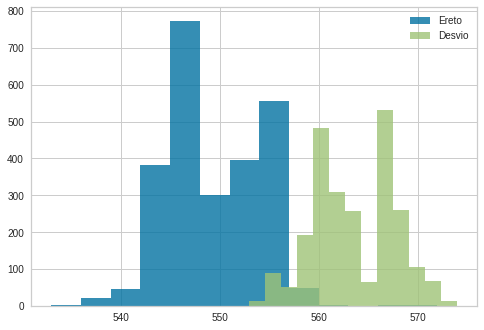

In [48]:
plt.hist(flex_at_1, bins=13, alpha=0.8)
plt.hist(flex_at_0, bins=13, alpha=0.8)
plt.legend(['Ereto', 'Desvio'])
plt.show()

In [49]:
scipy.stats.ttest_ind(
    a=flex_at_1,
    b=flex_at_0,
    equal_var=False,
    alternative='two-sided'
)

Ttest_indResult(statistic=-117.99051658616618, pvalue=0.0)

In [51]:
len(flex_at_1)

2527

# Test Ax

In [20]:
scipy.stats.ttest_ind(
    df[ df.Label == 1 ]['Az'].values,
    df[ df.Label == 0 ]['Az'].values,
    equal_var=False,
    alternative='two-sided'
)

Ttest_indResult(statistic=22.063615444536943, pvalue=9.61997664871025e-103)

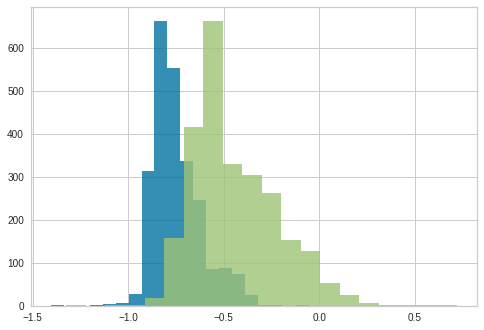

In [21]:
plt.hist(df[ df.Label == 0 ]['Ax'].values, bins=20, alpha=0.8)
plt.hist(df[ df.Label == 1 ]['Ax'].values, bins=20, alpha=0.8)
plt.show()